In [8]:
from bmc.simulate import simulate

BMCTool simulation: 100%|██████████| 328/328 [00:00<00:00, 11246.35it/s]


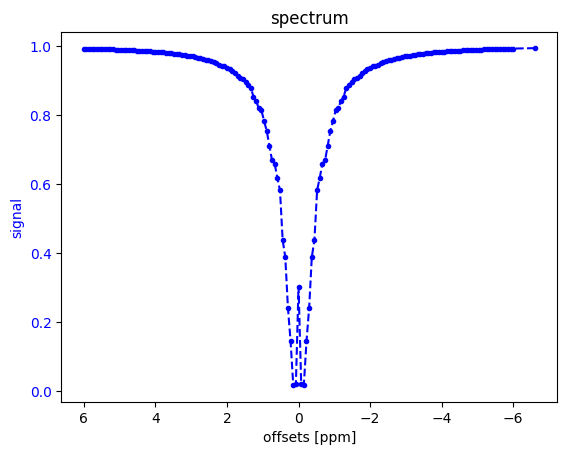

In [9]:
seq_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/default_seqid.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/default_seqid.seq'
config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'


simulate(config_file=config_path, seq_file=seq_path, show_plot=True)
# simulate(config_file=config_path_win, seq_file=seq_path_win, show_plot=True)  # simulation windows

### Simulation

In [1]:
from bmc.simulate import simulate_fid
import numpy as np

In [2]:
# seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
# seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'
seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss_gradient.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'
adc_time = 5
show_plot = True
write_all_mag = True
plt_range = [0, 5]
z_pos = np.linspace(-1e-6, 1e-6, 11)

11


BMCTool simulation: 100%|██████████| 4/4 [00:00<00:00, 30.40it/s]

rf at 0.0000s
gz at 0.0102s
rf at 0.5086s
adc at 0.5188s


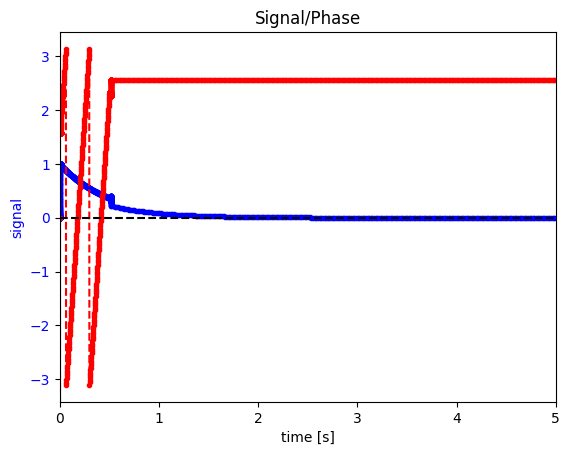

In [3]:
sim = simulate_fid(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   show_plot=show_plot, 
                   write_all_mag=write_all_mag, 
                   plt_range=plt_range)  # simulation mac

# sim = simulate_fid(config_file=config_path_win, seq_file=seq_path_gauss_win, adc_time=.5, show_plot=True)  # simulation windows

In [6]:
sim.get_time()[-1]

2.668143111111111

### Animation

In [8]:
run_time = .1
track_path = True
ie = False
timing = False
kwargs = {'quality': '-qh', 'write': '--write_to_movie'}  #--write_to_movie

In [9]:
sim.animate(run_time=run_time, 
            track_path=track_path, 
            ie=ie, 
            timing=timing, 
            **kwargs)

Manim Community v0.18.1